In [117]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [226]:

from sage.all import *
from utility import *



In [182]:
x,y,z = var('x, y, z', domain=CC)

# Equation of affine surface
G_eq = x*y*z + x + z + 1
fibration_eq = -3*x-2*z + y

f = LefschetzFibration([x,y,z], G_eq, fibration_eq)

rho_eq = 3*x+z

In [183]:
crit_points_f = f.get_critical_points()
crit_values_f = f.get_critical_values()



[complex(val) for val in crit_values_f]

[(3.2781296869160643+0j),
 (4.477418059114451-2.4379553179790467j),
 (4.477418059114451+2.437955317979047j),
 (-7.892550252636926+0j),
 (1.6595844138804132+0j)]

(<Figure size 640x480 with 1 Axes>, <Axes: >)

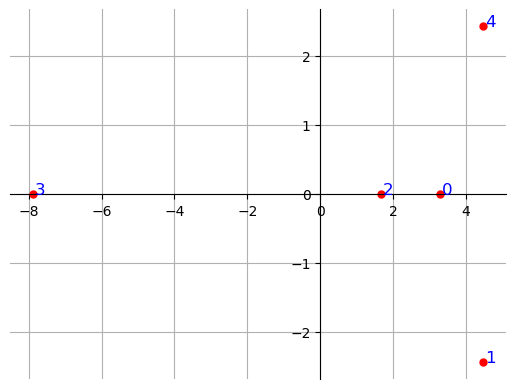

In [210]:
plot_points_ordered(crit_values_f, 'Critical values of the fibration', origin_fibre=2*I)

## Images of the vanishing cycles of $f$ under $\rho$

In [212]:
origin_fibre = 2*I
target_fibre = crit_values_f[0]


In [198]:
t = var('t', domain=CC)
s=0.4

fibre_t = f.get_fibre(t, y)
rho_eq_t = rho_eq.subs(y == fibre_t)

fibre_s = fibre_t.subs(t==(1-s)*origin_fibre + s*target_fibre)
rho_eq_s = rho_eq_t.subs(t==(1-s)*origin_fibre + s*target_fibre)
rho_s = LefschetzFibration([x,z], fibre_s, rho_eq_s)

[
y == t + 3*x + 2*z
]


(<Figure size 640x480 with 1 Axes>, <Axes: >)

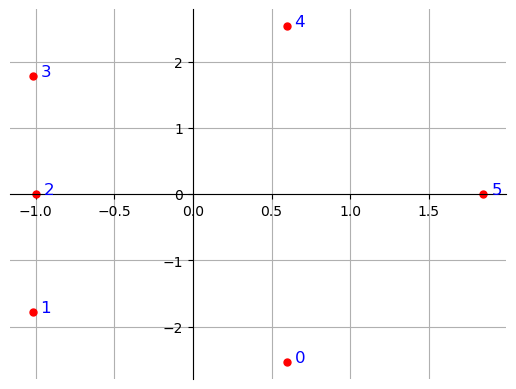

In [213]:
plot_points_ordered(LefschetzFibration([x,z], fibre_t.subs(t==0), rho_eq_t.subs(t==0)).get_critical_values())

In [200]:
cr = rho_s.get_critical_values()
print(cr)
print(len(cr))

[-1.9139756275906796 - 1.4430626759950207*I, -1.9139756275906796 + 1.4430626759950207*I, 0.2947506223986305, 0.23787479211525442 - 2.432205617616214*I, 0.23787479211525447 + 2.432205617616214*I, -0.8763046296944531]
6


In [201]:
matching_path = f.get_matching_path(rho_eq, 0, crit_values_f[0], solvefor=y)



[
y == t + 3*x + 2*z
]


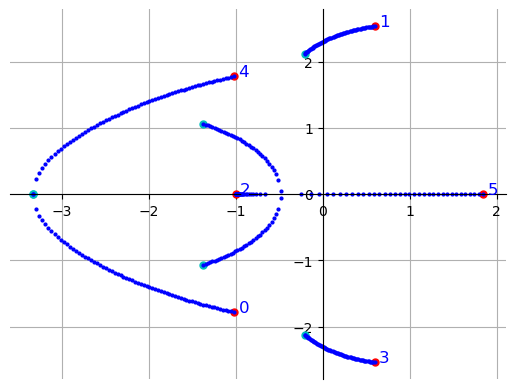

In [205]:
fig, ax = plot_path(matching_path)

plt.show()


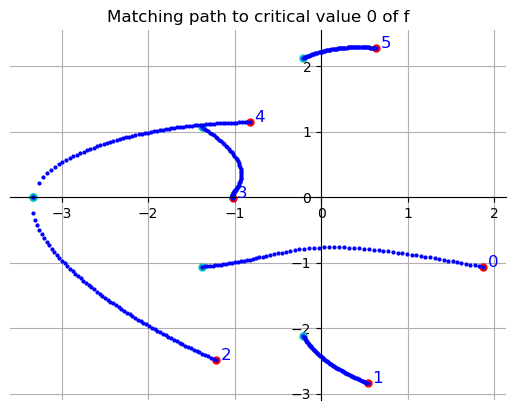

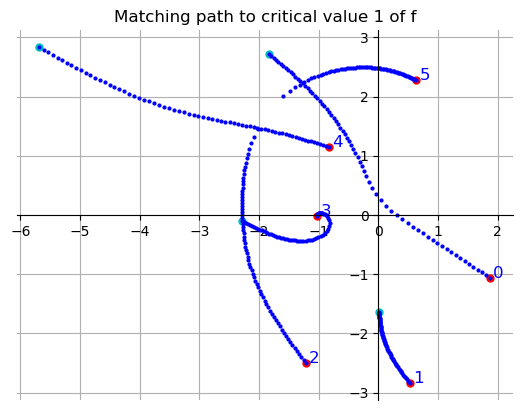

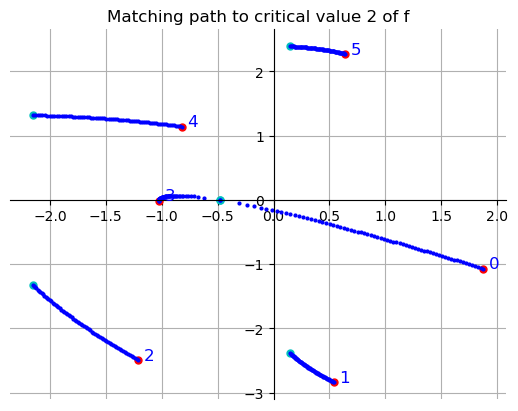

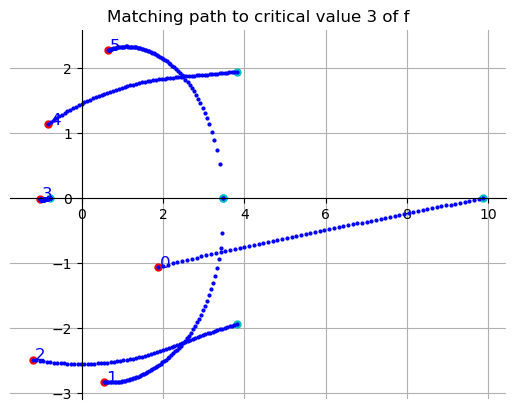

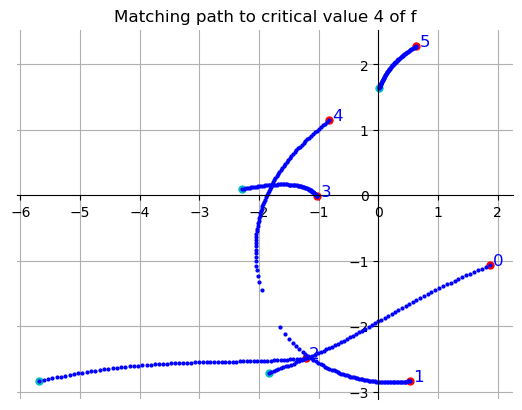

In [246]:
crit_values_f = sort_by_angle(crit_values_f, origin_fibre=origin_fibre)
for index, crit in enumerate(crit_values_f):
    matching = f.get_matching_path(rho_eq, I, crit, solvefor=y)
    fig, ax = plot_path(matching, title = f'Matching path to critical value {index} of f')
    plt.show()